In [1]:
import sys
import os
import spectral as sp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

sys.path.append('../')
from preprocessing import *
from plotting_parameters import *

### Create pngs of Helicoid data with original labels overlayed

In [51]:
import cv2

def save_img_gt(img, gt_map, class_colors, filename, bands=[109,192,425]):
    '''
    Plot the image. If gt_map is provided, the labeled pixels are overlayed on the image.
    input:
        img: image to plot, SpyFile or array-like
        bands: bands to use for RGB, list of ints
        gt_map: ground truth map, np.array or SpyFile
        class_labels: class labels for gt_map, list of strings
        filename: optional, filename to save the plot, str
    output:
        figure handle to the plot
    '''
    img_rgb = get_rgb(img, bands=bands)
    gt_map = get_array(gt_map).astype(int)
    class_ids = np.unique(gt_map)
    for class_id in class_ids[class_ids != 0]:
        mask = np.where(gt_map[:,:,0] == class_id)
        overlay = np.zeros_like(gt_map[:,:,0])
        overlay[mask] = 1
        overlay = np.repeat(overlay[:, :, np.newaxis], 3, axis=2)
        color = mcolors.hex2color(class_colors[class_id])
        img_rgb = np.where(overlay,
                    np.array(color),
                    img_rgb)
    # save image as .png
    folder = r'C:\Users\User\OneDrive\Dokumente\Uni\Master\Masterarbeit\datasets\helicoid\images'
    img_rgb = cv2.cvtColor((img_rgb*255).astype(np.uint8), cv2.COLOR_RGB2BGR)
    cv2.imwrite(os.path.join(folder, filename), img_rgb, [cv2.IMWRITE_PNG_COMPRESSION, 0])
    # plt.figure()
    # plt.imshow(img_rgb, aspect='equal', vmin=0, vmax=np.percentile(img_rgb, 50))
    # plt.title(filename)

In [52]:
# Define source folder
source_folder = r'C:\Users\User\OneDrive\Dokumente\Uni\Master\Masterarbeit\datasets\helicoid'
class_labels = ["Not labled", "Normal", "Tumor", "Hypervascularized", "Background"]
class_colors = ["white", tum_blue_dark_2, tum_orange, tum_red, tum_grey_5]

# Iterate through subfolders in the source folder
for foldername in os.listdir(source_folder):
    folder_path = os.path.join(source_folder, foldername)
    if foldername.startswith("0"):
        img = sp.open_image(folder_path + "/raw.hdr")
        gt_map = sp.open_image(folder_path + "/gtMap.hdr")
        filename = foldername + ".png"
        save_img_gt(img, gt_map, class_colors, filename)

### plot manual labels overlayed on image

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


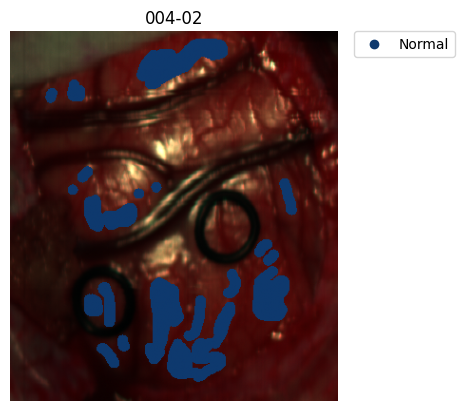

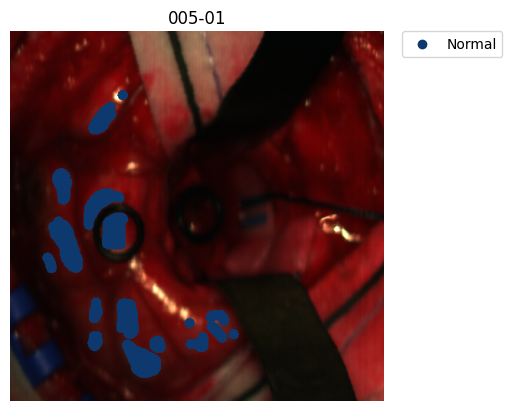

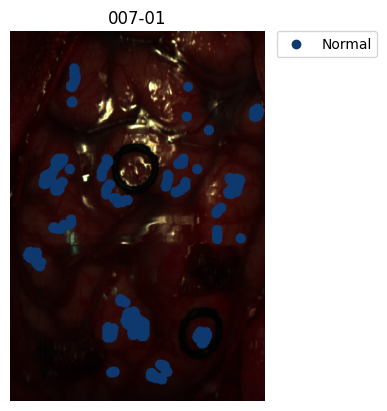

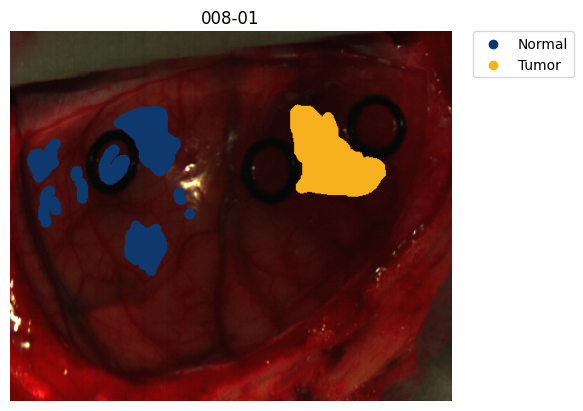

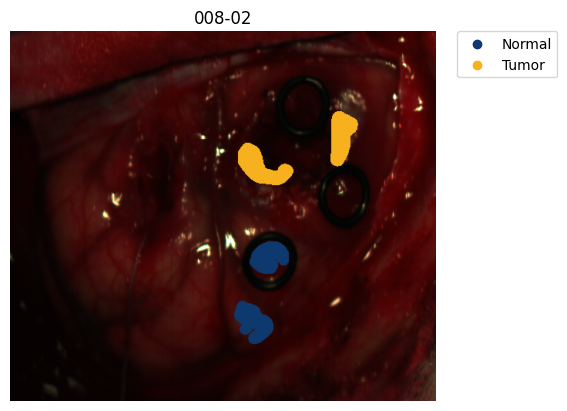

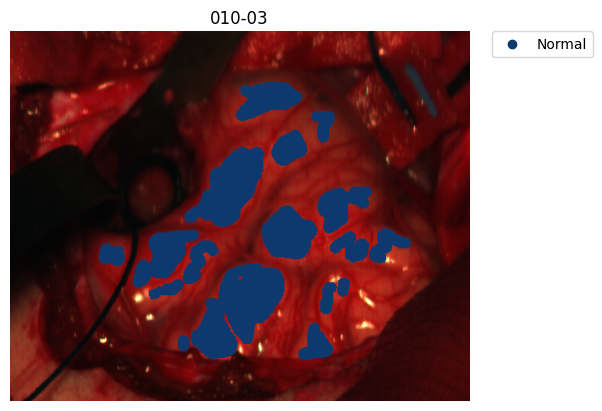

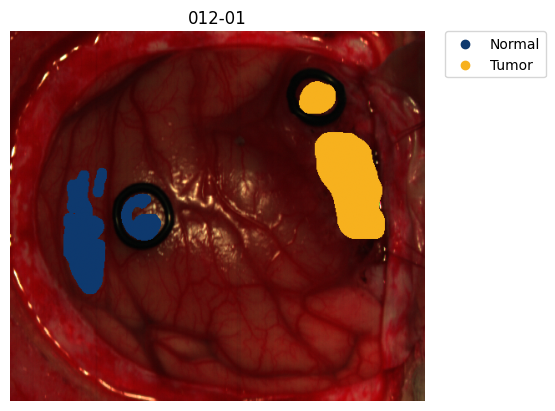

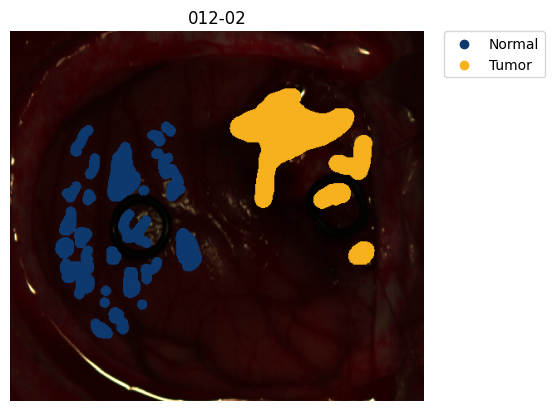

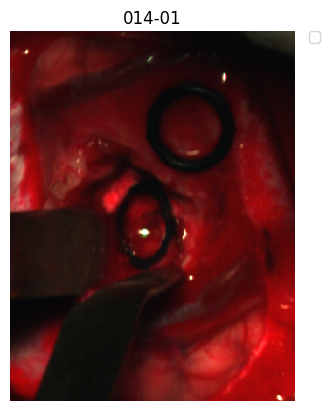

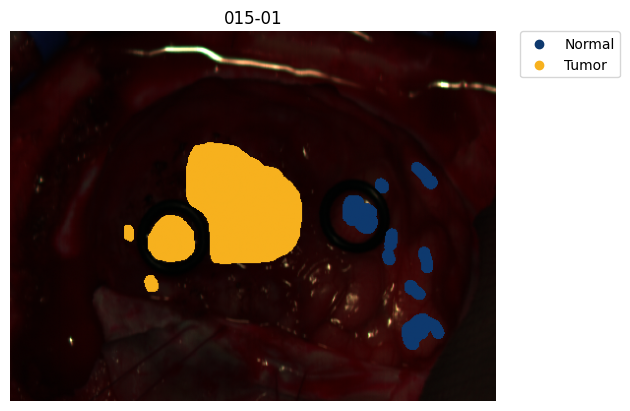

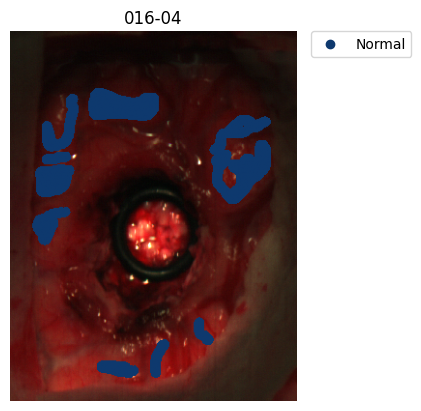

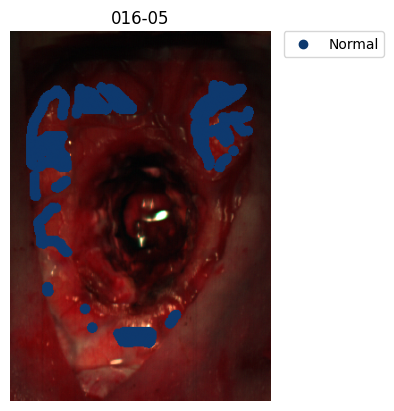

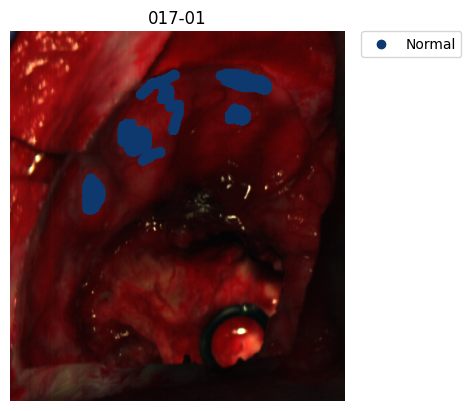

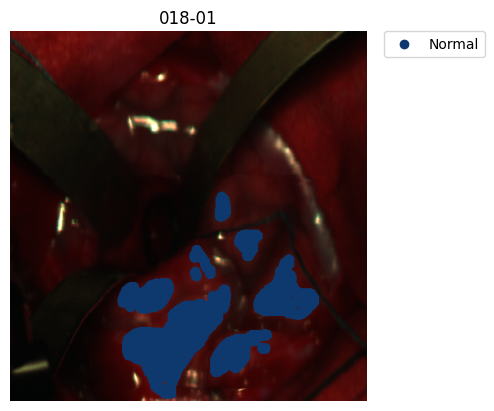

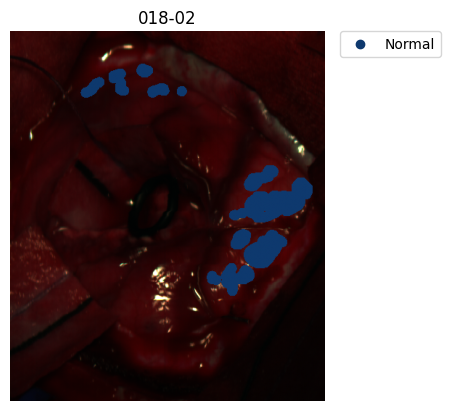

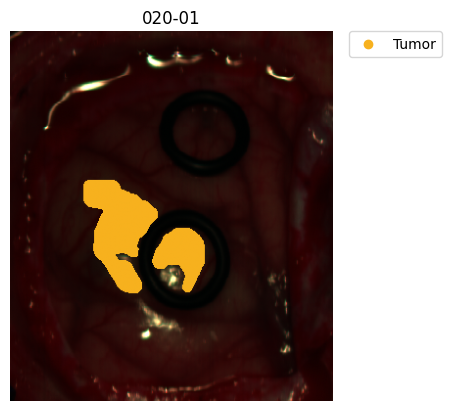

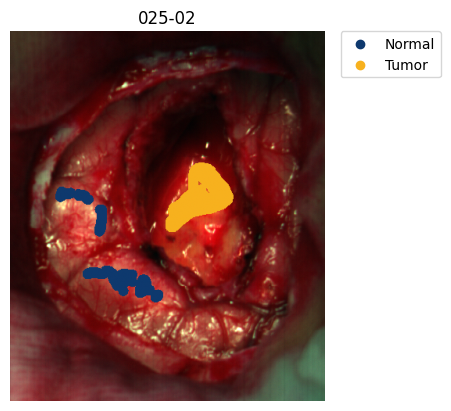

In [68]:
source_folder = r'C:\Users\User\OneDrive\Dokumente\Uni\Master\Masterarbeit\datasets\helicoid'
label_folder = r'C:\Users\User\OneDrive\Dokumente\Uni\Master\Masterarbeit\datasets\helicoid\manual_labels'

for foldername in os.listdir(source_folder):
    folder_path = os.path.join(source_folder, foldername)
    if foldername.startswith("0"):
        img = sp.open_image(folder_path + "/raw.hdr")
        label_normal_path = os.path.join(label_folder, foldername) + "_normal.npy"
        label_tumor_path = os.path.join(label_folder, foldername) + "_tumor.npy"
        label_combined = np.zeros_like(img[:,:,0].squeeze())
        if os.path.exists(label_normal_path):
            label_normal = np.load(label_normal_path)
            label_normal[label_normal>0] = 1
            label_combined += label_normal
        if os.path.exists(label_tumor_path):
            label_tumor = np.load(label_tumor_path)
            label_tumor[label_tumor>0] = 2
            label_combined += label_tumor

        np.save(os.path.join(folder_path, "labels.npy"), label_combined)
        fig, ax = plot_img(img, label_combined, ["Not labeled", "Normal", "Tumor"], ["white", tum_blue_dark_2, tum_orange], figsize=(5,5), legend=True)        
        ax.set_title(foldername)